In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#############
## Part(a) ##
#############
def get_A(k):
    A = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            if i < j:
                A[i, j] = np.exp((i+1)/(j+1))*np.cos((i+1)*(j+1))*np.sin(k)
                A[j, i] = A[i, j]
    
    for i in range(10):
        A[i, i] = ((i+1)/10)*abs(np.sin(k)) + sum([abs(A[i, j]) for j in range(10) if i!=j])
    return A

def get_b(k):
    b = np.zeros((10))
    for i in range(10):
        b[i] = np.exp((i+1)/k)*np.sin((i+1)*k)
    return b

def solve_f(x):
    k_val = []
    for i in range(5):
        k = i + 1
        A_k = get_A(k)
        b_k = get_b(k)
        f_x = x.T @ A_k @ x - b_k.T @ x
        k_val.append(f_x)
    #print("Values are", k_val)
    return max(k_val)
    

In [124]:
#############
## Part(a) ##
#############
x_1 = np.ones(10)
print("f(x1) is :", solve_f(x_1))



f(x1) is : 5337.066429311362


In [121]:
#############
## Part(b) ##
#############

def find_descent(A, b, x):
    df = 2*(A@x)-b
    df_norm = np.linalg.norm(df, 2)
    if df_norm == 0:
        converged = True
    else:
        converged = False

    return df/df_norm,converged, df_norm
    



x optimal is: 98.574325687121


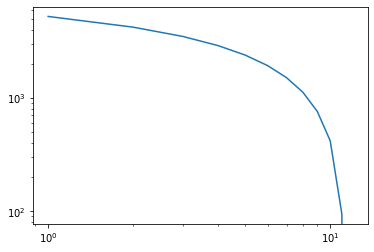

In [122]:
#############
## Part(b) ##
#############
converge = False
loss = []
ite = []
x = np.ones(10)
t = 1
C =0.08
tol = 0.00001
loglog_y = []
while not converge:
    ite.append(t)
    
    f_vals = solve_f(x)
    x_i = np.argmax(f_vals) + 1
    max_x = np.max(f_vals)
    loglog_y.append(max_x)
    A = get_A(x_i)
    b = get_b(x_i)

    
    gx, converged , _= find_descent(A, b, x)
    if converged:
        break
    #rint(gx)
    step_size = C / np.sqrt(t)
    
    x_next = x - step_size * gx
    if (np.linalg.norm(x, 2) - np.linalg.norm(x_next, 2))<tol:
        break
    x = x_next
    
    t = t + 1
    
x_optimal = loglog_y[-1]
loglog_y = [x - x_optimal for x in loglog_y]
plt.loglog(ite, loglog_y)
print("x optimal is:", x_optimal)



In [126]:
#############
## Part(c) ##
#############

##########################################
### Here I guess the optimal f(x*) is 0 ##
##########################################

converge = False
loss = []
ite = []
x = np.ones(10)
t = 1
C =0.08
tol = 0.0001
loglog_y = []
while not converge:
    ite.append(t)
    
    f_vals = solve_f(x)
    x_i = np.argmax(f_vals) + 1
    max_x = np.max(f_vals)
    loglog_y.append(max_x)
    A = get_A(x_i)
    b = get_b(x_i)

    
    gx, converged, g_norm = find_descent(A, b, x)
    if converged:
        break
    #rint(gx)
    step_size = max_x / g_norm
    
    x_next = x - step_size * gx
    #if (np.linalg.norm(x, 2) - np.linalg.norm(x_next, 2))<tol:
    #    break
    x = x_next
    
    t = t + 1
    
x_optimal = loglog_y[-1]
loglog_y = [x - x_optimal for x in loglog_y]
plt.loglog(ite, loglog_y)
print("x optimal is:", x_optimal)




MemoryError: 